In [6]:
# import neccessary packages
import os
import sys
import cv2
import numpy as np
import glob
import math
import matplotlib.pyplot as plt

In [5]:

# Thay đổi đường dẫn đến thư mục chứa các tệp Python trên máy tính của bạn
local_directory = "C:\Users\Admin/Desktop/ARS-TRG-SP1-17-Assignment-20241003T143452Z-001/ARS-TRG-SP1-17-Assignment/Assignment-1/ExpNo00"

# Kiểm tra xem thư mục có tồn tại không và thêm vào đường dẫn
if os.path.exists(local_directory):
    sys.path.append(local_directory)
else:
    print(f"Thư mục {local_directory} không tồn tại.")


In [8]:
import utils

In [10]:
def plot_image(img, fig_size=(8,6), cmap=None):
    if cmap is None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.close("all")
    plt.figure(figsize=fig_size)
    plt.imshow(img, cmap=cmap)
    plt.show()

## 1. List image paths from directory

In [12]:
img_dir = 'ExpNo00'    
img_path_list = glob.glob(os.path.join(img_dir, '*.jpg'))
print(img_path_list)

['ExpNo00\\2023-10-25-15-21-55.jpg', 'ExpNo00\\2023-10-25-15-22-56.jpg', 'ExpNo00\\2023-10-25-15-23-07.jpg', 'ExpNo00\\2023-10-25-15-23-20.jpg', 'ExpNo00\\2023-10-25-15-23-29.jpg', 'ExpNo00\\2023-10-25-15-23-35.jpg', 'ExpNo00\\2023-10-25-15-23-49.jpg']


## 2. Implement funtion to process 1 image

<font color='red'>Please put your code in the next cells</font>

Description: Function to extract the image of object
+ Input: (str) image path
+ Input: (bool) debug flag: set True to display images
+ Output: (nd.array) image of object

The detail processing flow in this function as below:
* step1: Read image
* step2: Resize image with downscale ratio = 4 to speed up (optimize processing time)
* step3: Convert RGB to GRAY
* step4: Apply Gaussian blur (kernel size = 3 or 5)
* step5: Thresholding (Use OTSU method) --> <font color='green'>CHECK1: display binary image</font>
* step6: Remove noise (Use cv2.MORPH_OPEN) --> <font color='green'>CHECK2: display morphology image</font>
* step7: Find contour (Use cv2.findContours)
* step8: Draw contour (Use cv2.drawContours) ---> <font color='green'>CHECK3: display image with contour </font>
* step9: Find 4 corners (Use function implemeted before) ---> <font color='green'>CHECK4: display image with 4 corners found</font>
* step10: Perspective transform (Use utils.order_points and utils.four_point_transform)  ---> <font color='green'>CHECK5: display transformed image</font>

In [23]:
# Define the function to detect card object below ...
def detect_idcard(img_path, debug=False):
    # step1-Read image
    img0 = cv2.imread(img_path)

    # step2-Resize image
    scale_ratio = 4
    img = cv2.resize(img0, None, fx=1/scale_ratio, fy=1/scale_ratio, interpolation=cv2.INTER_AREA)

    #

    return


In [16]:

from utils import plot_image, find_four_corners, order_points, four_point_transform

def extract_object_image(image_path, debug=False):
    # Step 1: Read image
    img = cv2.imread(image_path)
    
    # Kiểm tra xem ảnh đã đọc được hay chưa
    if img is None:
        raise FileNotFoundError(f"Không thể đọc được hình ảnh từ đường dẫn: {image_path}")

    # Step 2: Resize image to speed up processing
    downscale_ratio = 4
    img = cv2.resize(img, (img.shape[1] // downscale_ratio, img.shape[0] // downscale_ratio))

    # Step 3: Convert RGB to GRAY
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Step 4: Apply Gaussian blur (kernel size = 5)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 5: Thresholding using OTSU method
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if debug:
        plot_image(binary, fig_size=(8, 6), cmap='gray')  # CHECK1: display binary image

    # Step 6: Remove noise using Morphological Opening
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    if debug:
        plot_image(morph, fig_size=(8, 6), cmap='gray')  # CHECK2: display morphology image

    # Step 7: Find contours
    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 8: Draw contours
    img_contour = img.copy()
    cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)
    if debug:
        plot_image(img_contour, fig_size=(8, 6))  # CHECK3: display image with contour

    # Step 9: Find 4 corners using `find_four_corners` function
    
    max_contour = max(contours, key=cv2.contourArea)
    corners = find_four_corners(img.shape[:2], max_contour.squeeze())
    for corner in corners:
        cv2.circle(img, tuple(corner), 5, (0, 0, 255), -1)
    if debug:
        plot_image(img, fig_size=(8, 6))  # CHECK4: display image with 4 corners found

    # Step 10: Perspective transform using `four_point_transform`
    corners = order_points(np.array(corners, dtype="float32"))
    warped = four_point_transform(img, corners)
    if debug:
        plot_image(warped, fig_size=(8, 6))  # CHECK5: display transformed image

    return warped


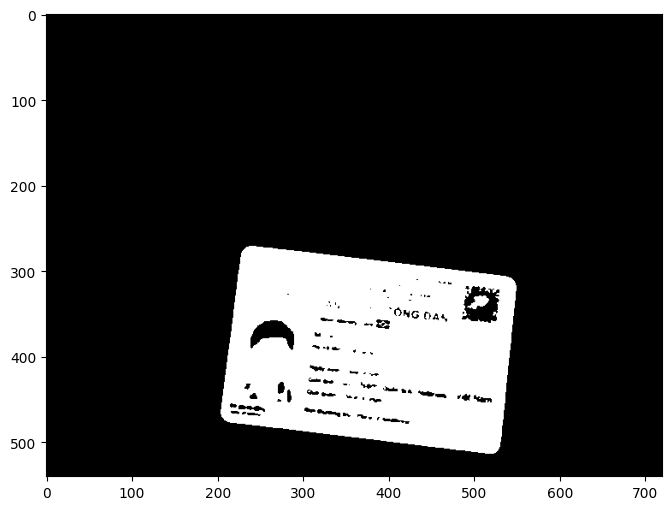

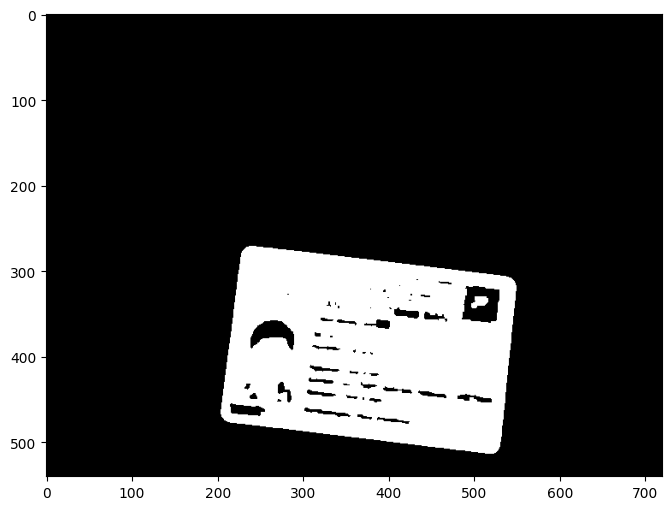

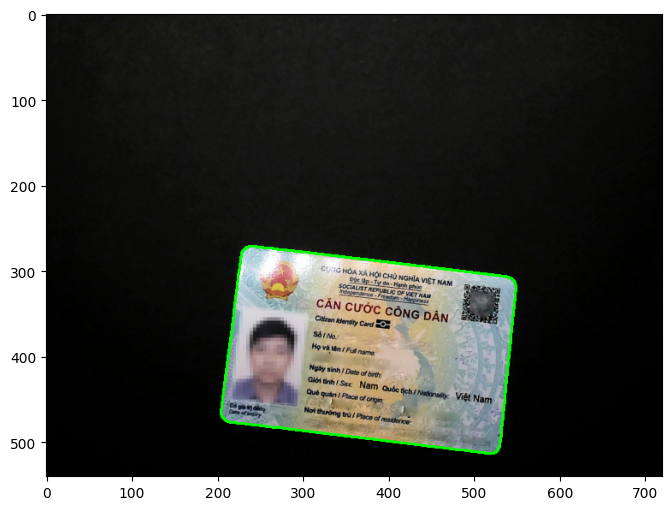

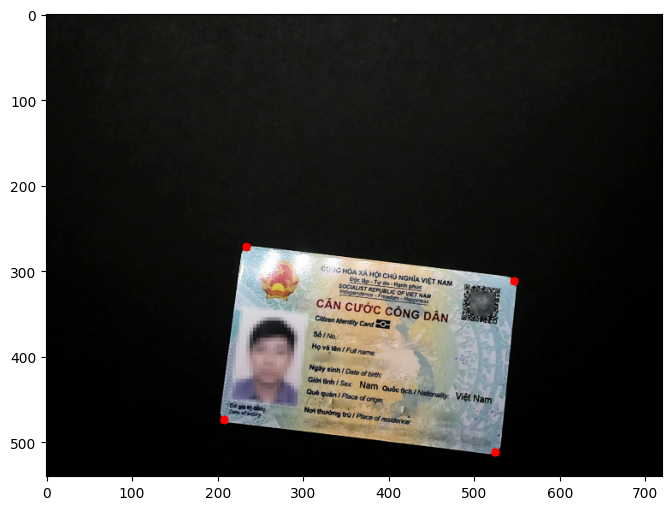

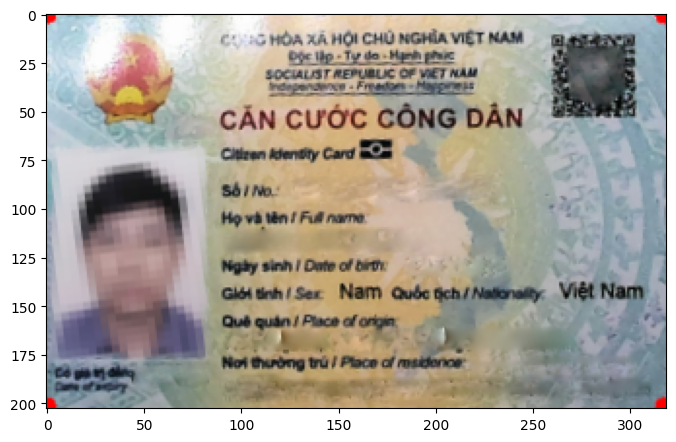

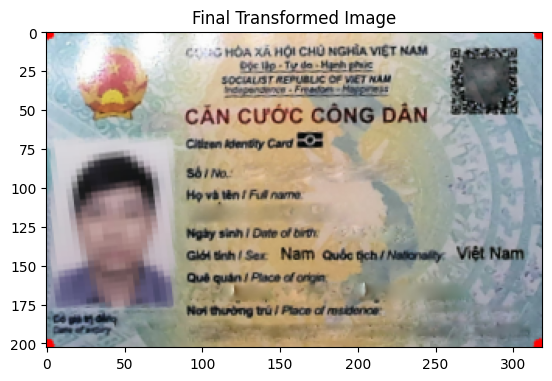

In [18]:
# Đường dẫn đến hình ảnh bạn muốn xử lý (thay thế bằng đường dẫn thực tế)
img_path = "ExpNo00\\2023-10-25-15-21-55.jpg"

# Gọi hàm với chế độ debug để hiển thị các bước kiểm tra
img_warped = extract_object_image(img_path, debug=True)

# Hiển thị kết quả hình ảnh cuối cùng sau khi biến đổi phối cảnh

plt.imshow(cv2.cvtColor(img_warped, cv2.COLOR_BGR2RGB))
plt.title("Final Transformed Image")
plt.show()


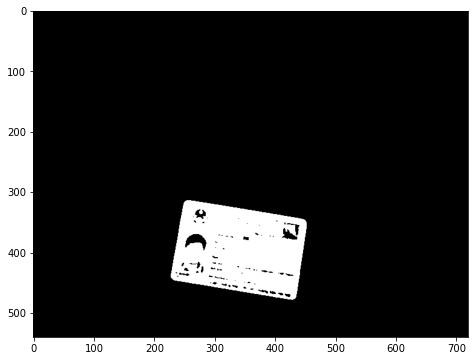

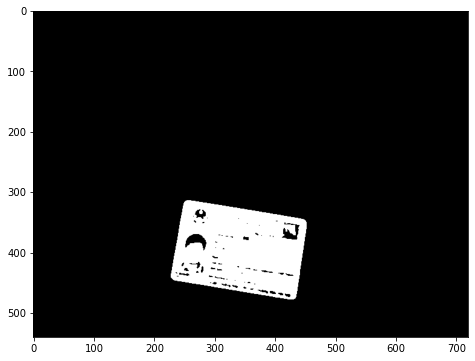

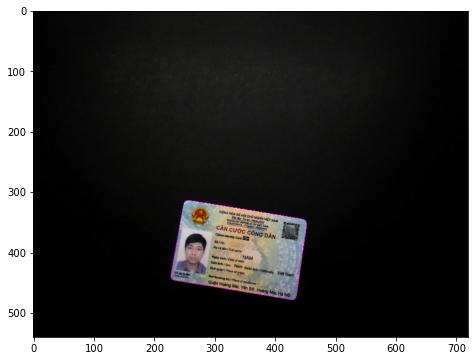

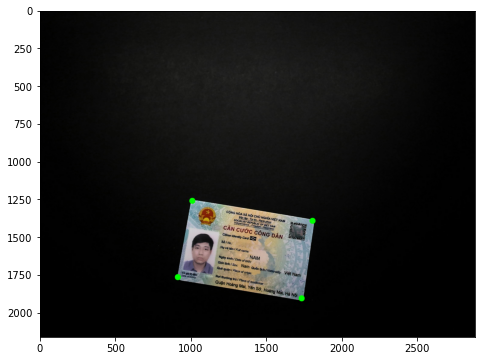

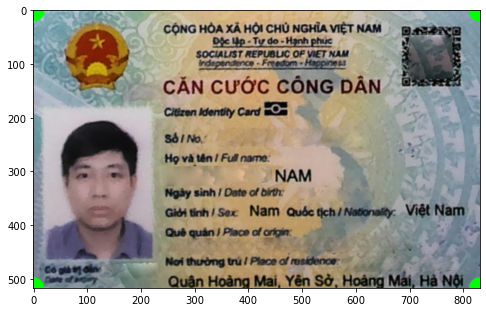

In [24]:
# Call your function to process for 1 image. 
# Example: you run command "img_warped = detect_idcard(img_path=img_path_list[1], debug=True)". The image result (CHECK POINT) are as below.
# ...

## 2. Loop and process every image, save the result to the output directory


In [25]:
out_dir = 'output'
os.makedirs(out_dir, exist_ok=True)

for img_path in img_path_list:
    print(img_name)
    img_warped = detect_idcard(img_path, debug=False)
    img_name = os.path.basename(img_path)
    plot_image(img_warped)

    # Save images to the directory
    cv2.imwrite(os.path.join(out_dir, img_name), img_warped)

2023-10-25-15-23-49.jpg


NameError: name 'detect_idcard' is not defined

2023-10-25-15-21-55.jpg


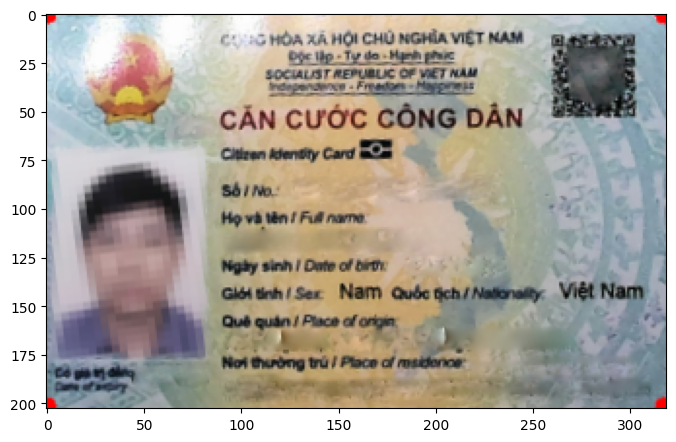

2023-10-25-15-22-56.jpg


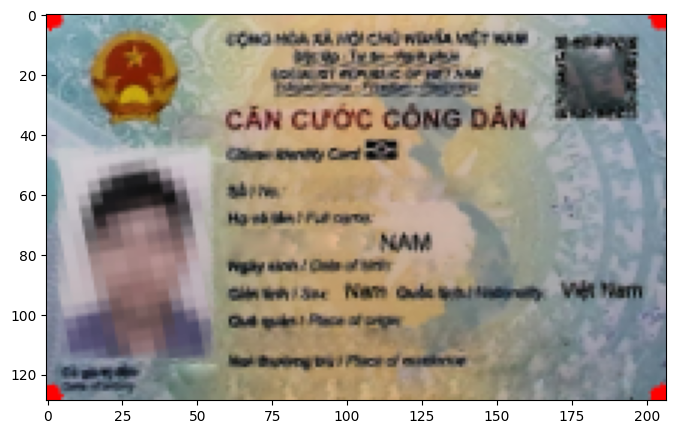

2023-10-25-15-23-07.jpg


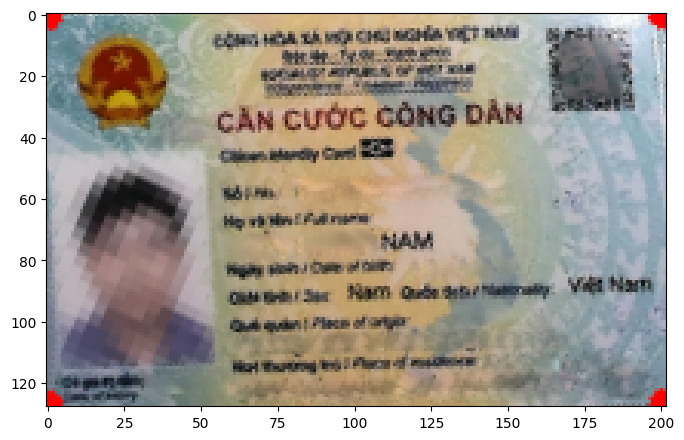

2023-10-25-15-23-20.jpg


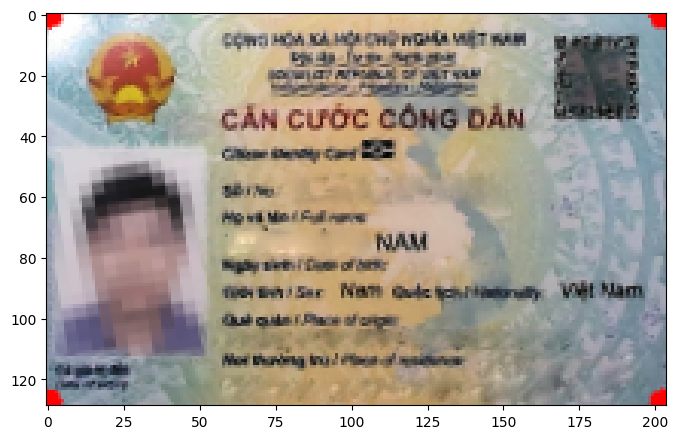

2023-10-25-15-23-29.jpg


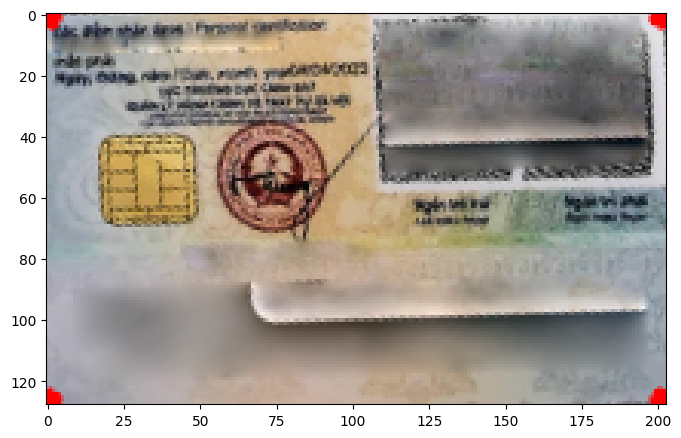

2023-10-25-15-23-35.jpg


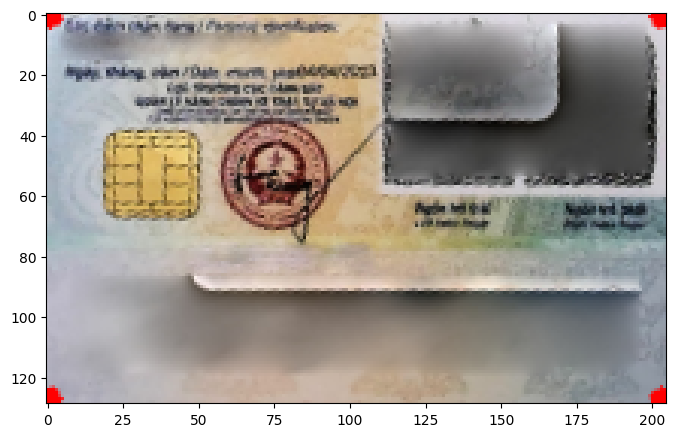

2023-10-25-15-23-49.jpg


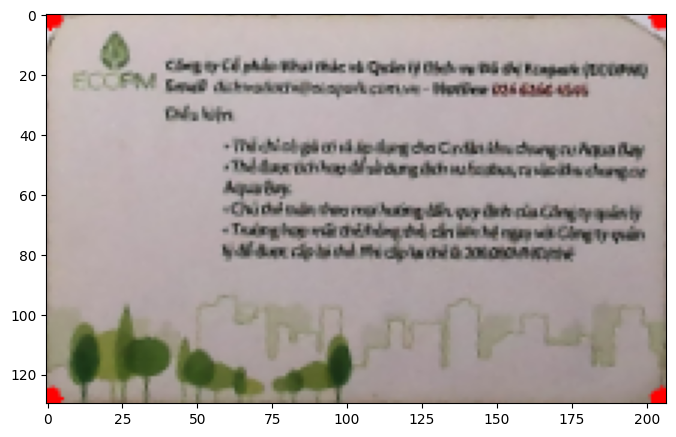

In [37]:
out_dir = 'output'
os.makedirs(out_dir, exist_ok=True)

for img_path in img_path_list:
    img_warped = extract_object_image(img_path, debug=False)
    img_name = os.path.basename(img_path)
    print(img_name)
    plot_image(img_warped)

    # Save images to the directory
    cv2.imwrite(os.path.join(out_dir, img_name), img_warped)